# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [218]:
from scipy.stats import binom
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
import math
from scipy.stats import poisson
from math import e
import numpy as np
import seaborn as sns
from scipy.stats import norm
import pandas as pd
import statistics as stats
from scipy.stats import shapiro
from scipy.stats import expon

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.02624589 2.01755295 2.53058189 2.81072056 2.88430465 2.66306823
 2.56504354 2.11712742 2.99841582 2.56297897]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

<AxesSubplot:ylabel='Count'>

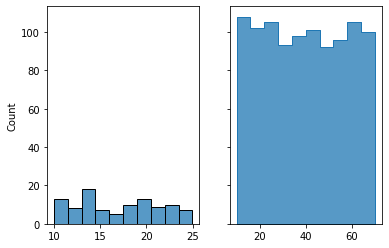

In [35]:
my_uni= uniform(10,15)
my_uni2=uniform(10,60)
sample= my_uni.rvs(100)
sample2= my_uni2.rvs(1000)
fig , axis = plt.subplots(nrows=1, ncols=2,sharey=True)
sns.histplot(sample, ax= axis[0], bins=10)
sns.histplot(sample2, ax= axis[1], bins=10, element= 'step')


How are the two distributions different?

Actually, they are not that different, as they both follow a uniform distribution, and there is the same amount of infinite numberss between 10 and 15, and between 10 and 60. However the second plot will show a greater count of each bin as the number of repetitions of the experiment is higher, but if we incrementedd the number of times the experiment is executed for the first sample, the distribution would be very similar(as shown below with sample 3).

<AxesSubplot:ylabel='Count'>

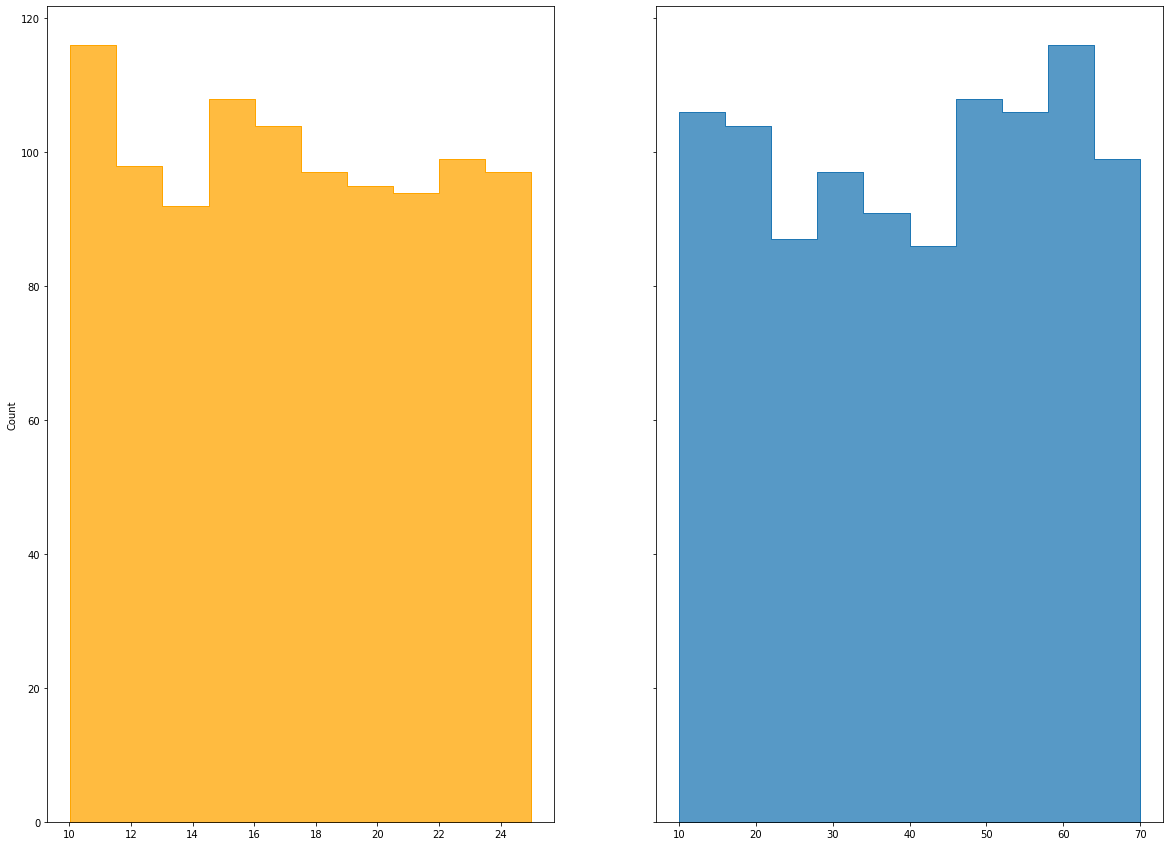

In [73]:
my_uni3= uniform(10,15)
my_uni2=uniform(10,60)
sample3= my_uni3.rvs(1000)
sample2= my_uni2.rvs(1000)
fig , axis = plt.subplots(nrows=1, ncols=2,sharey=True, figsize=(20,15))
sns.histplot(sample3, ax= axis[0], bins=10, element='step', color='orange')
sns.histplot(sample2, ax= axis[1], bins=10, element= 'step')

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

<AxesSubplot:ylabel='Count'>

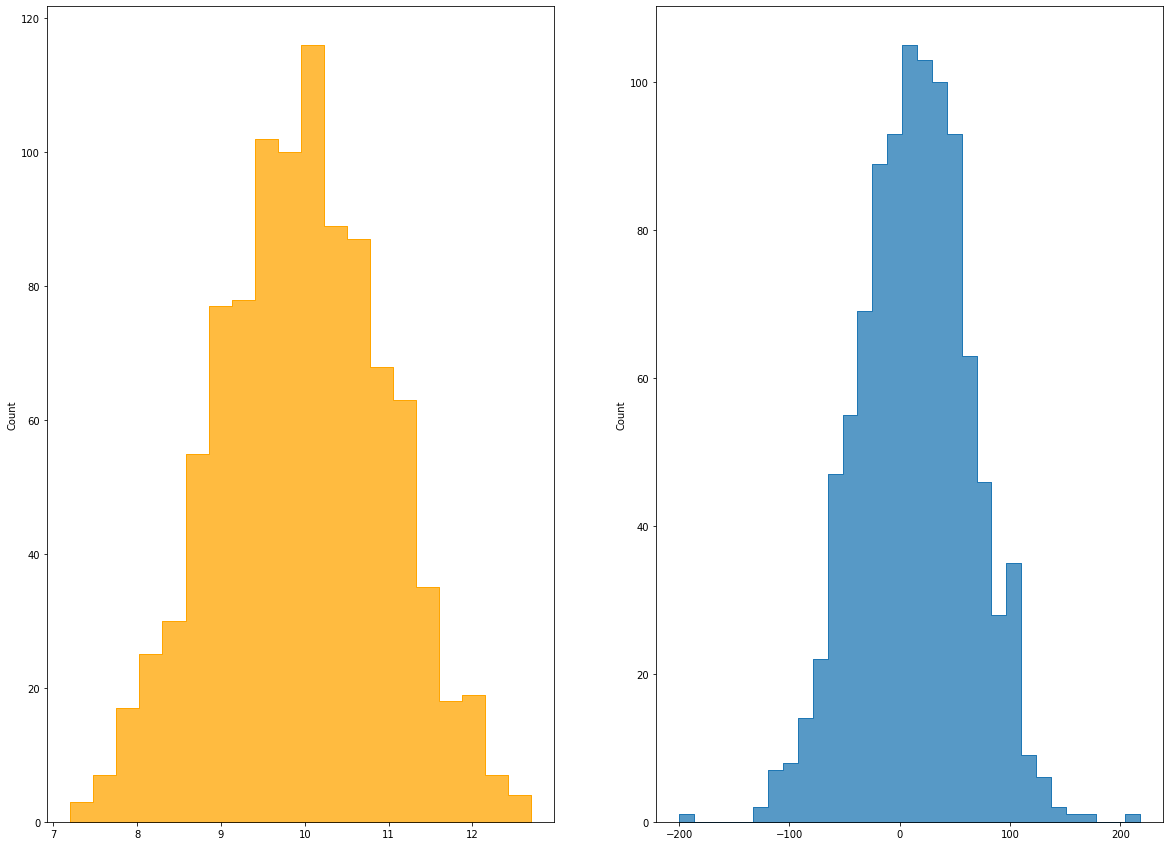

In [75]:
# Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
# Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
my_normal = norm(loc=10, scale=1)
my_normal2 = norm(loc=10, scale=50)
sample = my_normal.rvs(1000)
sample2 = my_normal2.rvs(1000)
fig , axis = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
sns.histplot(sample, ax= axis[0], element='step', color='orange')
sns.histplot(sample2, ax= axis[1], element= 'step')

How are the two distributions different?

They are both normal distributions, so their mean, mode and median will be very similar. However in the second graph we can see the x axis is much larger, as the standard deviation is way higher. The data is more spread out in the second graph.

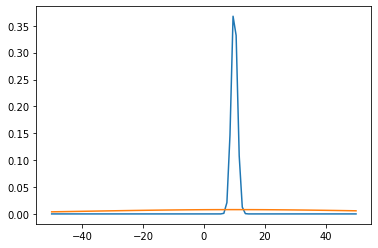

In [68]:
x = np.linspace(-50 ,50,100)
y = my_normal.pdf(x)
y2 = my_normal2.pdf(x)
plt.plot(x, y)
plt.plot(x, y2);

It is not very easy to read into this graph, however, it shows how the probability of these two diferent normal distributions vary a lot. In my_normal, the majority of the probability is accumulated near the mean, due to its low satndard variation, on the other hand in my_normal2, the probability distribution is very spread out, and the changes in probability in the different raanges are very small. However this will translate in a very similar countplot when we execute an experiment, they are two very different things.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [79]:
Vehicles= pd.read_csv('vehicles.csv')

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [91]:
c=Vehicles.groupby('Fuel Barrels/Year').agg(['count'])

<AxesSubplot:xlabel='Fuel Barrels/Year', ylabel='Count'>

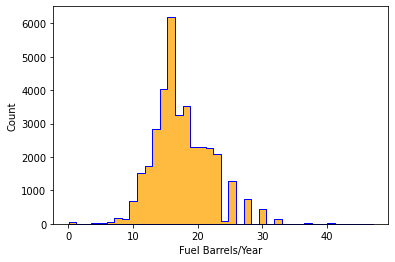

In [103]:
sns.histplot(data=Vehicles, x='Fuel Barrels/Year', bins=40, color='orange', ec='blue', element='step')

2. CO2 Emission Grams/Mile 

<AxesSubplot:xlabel='CO2 Emission Grams/Mile', ylabel='Count'>

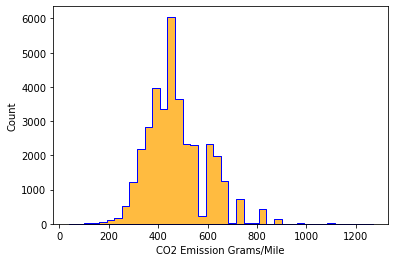

In [105]:
sns.histplot(data=Vehicles, x='CO2 Emission Grams/Mile', bins=40, color='orange', ec='blue', element='step')

3. Combined MPG

<AxesSubplot:xlabel='Combined MPG', ylabel='Count'>

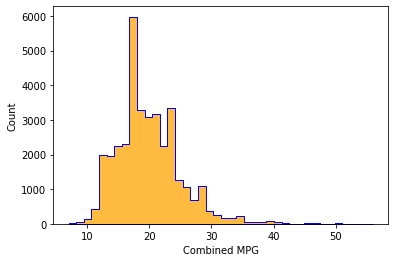

In [106]:
sns.histplot(data=Vehicles, x='Combined MPG', bins=40, color='orange', ec='blue', element='step')

<AxesSubplot:xlabel='Combined MPG', ylabel='Count'>

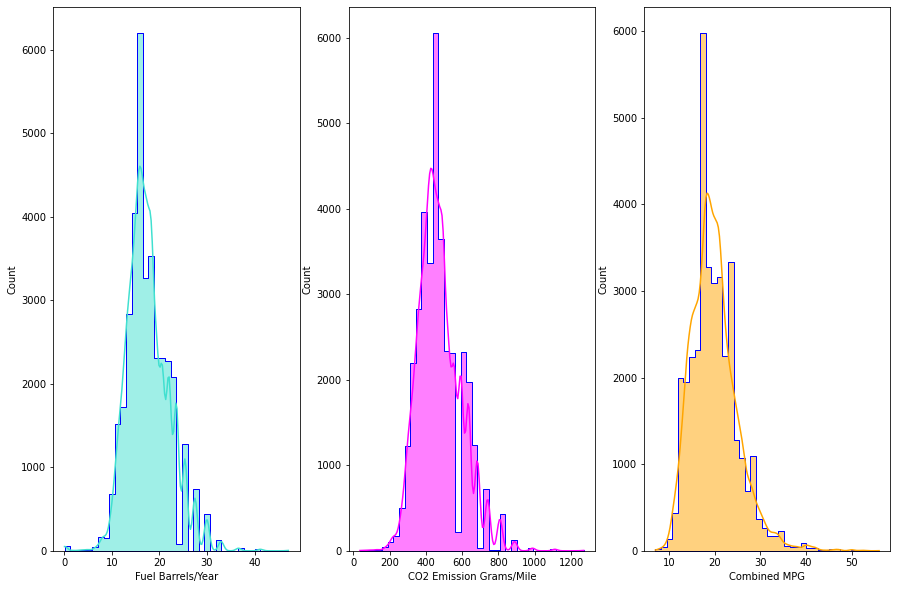

In [114]:
fis, axis= plt.subplots(nrows=1, ncols=3, figsize=(15,10))
sns.histplot(data=Vehicles, x='Fuel Barrels/Year', bins=40, color='turquoise', ec='blue', element='step',ax=axis[0], kde=True)
sns.histplot(data=Vehicles, x='CO2 Emission Grams/Mile', bins=40, color='magenta', ec='blue', element='step', ax=axis[1], kde=True)
sns.histplot(data=Vehicles, x='Combined MPG', bins=40, color='orange', ec='blue', element='step',ax=axis[2], kde= True)

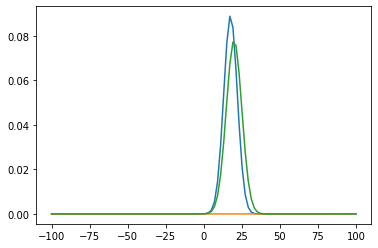

In [131]:
def sacar(data, columna):
    media=data[f'{columna}'].mean()
    stdev=data[f'{columna}'].std()
    median=data[f'{columna}'].median()
    mode= data[f'{columna}'].mode()
    return media, stdev, median, mode
columnas=['Fuel Barrels/Year', 'CO2 Emission Grams/Mile', 'Combined MPG' ]
Dict={}
for i in columnas:
    Dict[str(i)]= (sacar(Vehicles, i))   
Dict
my_normal = norm(loc=Dict['Fuel Barrels/Year'][0], scale=Dict['Fuel Barrels/Year'][1])
my_normal2 = norm(loc=Dict['CO2 Emission Grams/Mile'][0], scale=Dict['CO2 Emission Grams/Mile'][1])
my_normal3 = norm(loc=Dict['Combined MPG'][0], scale=Dict['Combined MPG'][1])
x = np.linspace(-100 ,100,100)
y = my_normal.pdf(x)
y2 = my_normal2.pdf(x)
y3 = my_normal3.pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x,y3);

In [156]:
Dict

{'Fuel Barrels/Year': (17.609055502328133,
  4.467282686296915,
  17.347894736842107,
  0    18.311667
  dtype: float64),
 'CO2 Emission Grams/Mile': (475.3163392572124,
  119.06077323592496,
  467.7368421052632,
  0    493.722222
  dtype: float64),
 'Combined MPG': (19.92932242990654,
  5.112408944666045,
  19.0,
  0    18
  dtype: int64)}

Which one(s) of the variables are nearly normally distributed? How do you know?

In [165]:
Lista=list([])
for i in columnas:
    x=Dict[str(i)][0]
    y= Dict[str(i)][2]
    Lista.append((x-y)*100/y)
    
Lista

[1.5054320391476217, 1.6204618643753268, 4.891170683718639]

In [174]:
print(shapiro(Vehicles['Fuel Barrels/Year']))
print(shapiro(Vehicles['CO2 Emission Grams/Mile']))
print(shapiro(Vehicles['Combined MPG']))

ShapiroResult(statistic=0.9674159288406372, pvalue=0.0)
ShapiroResult(statistic=0.9674911499023438, pvalue=0.0)
ShapiroResult(statistic=0.9466151595115662, pvalue=0.0)


Atendiendo a este cálculo, me sale que de las tres distribuciones, en aquella dónde la diferencia porcentual entre la meddia y la mediana es peor, es en la de 'Fuel Barrels/Year'. Finalmente atendiendo al test de Shapiro, vemos que todos tienen un p-valor menor a 0.05 por lo que son todas distribuciones normales.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

<AxesSubplot:ylabel='Count'>

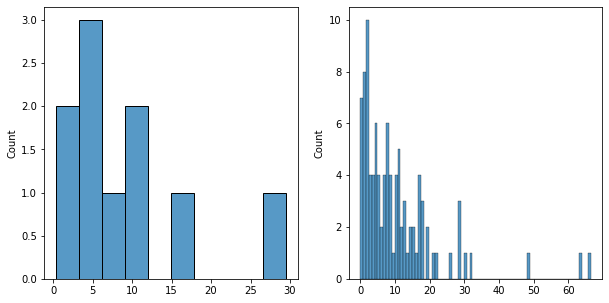

In [215]:
exp=np.random.exponential(10, 10)
exp1= np.random.exponential(10, 100)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
sns.histplot(exp, bins=10 , ax=axes[0]) 
sns.histplot(exp1, bins=80, ax=axes[1]) 

How are the two distributions different?

The number of attempts is different, therefore, it will be harder to see the exponential distribution in the first graph as its sample size is really low. Below, I plot graph that will be similar to the one in the question, however I will needd to use different parameters.

<AxesSubplot:ylabel='Count'>

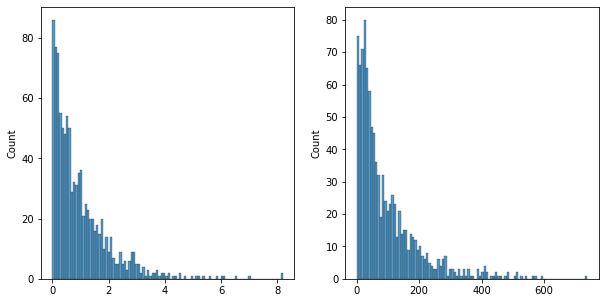

In [223]:
exp=np.random.exponential(1, 1000)
exp1= np.random.exponential(100, 1000)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
sns.histplot(exp, bins=100 , ax=axes[0]) 
sns.histplot(exp1, bins=100, ax=axes[1]) 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [220]:
# your answer here
b= expon(scale = 10)
b.cdf(14)

0.7534030360583935

What is the probability that the customer will spend more than 15 minutes

In [221]:
1-b.cdf(14)

0.24659696394160646